In [202]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = ride_df.merge(city_df, on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

<IPython.core.display.Javascript object>


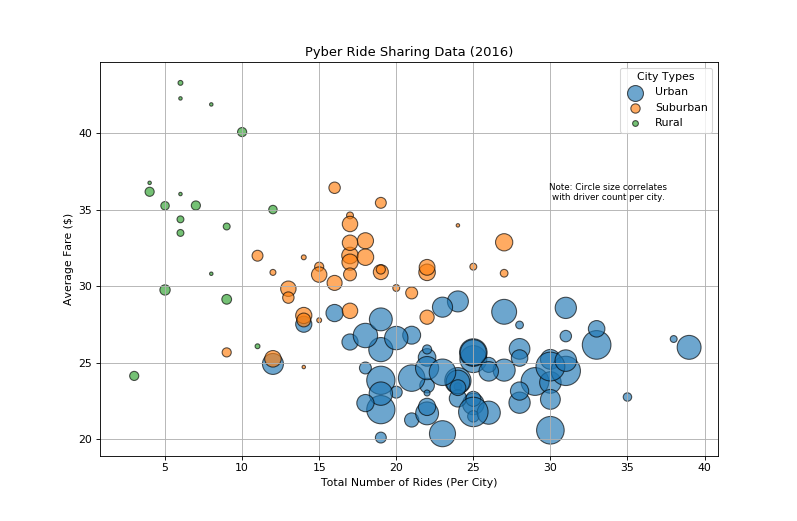

Text(33.75,35.6,'Note: Circle size correlates\nwith driver count per city.')

In [203]:
# Obtain the x and y coordinates for each of the three city types
city_rides_total = combined_df[['city', 'ride_id','type','driver_count']].groupby(['city', 'type','driver_count'], as_index=False).count()
city_fares_total = combined_df[['city','fare']].groupby('city', as_index=False).sum()
city_fares_avg = combined_df[['city','fare']].groupby('city', as_index=False).mean()

cities_totals_df = city_rides_total.merge(city_fares_total, on='city')
cities_summary_df = cities_totals_df.merge(city_fares_avg, on='city')
cities_summary_df = cities_summary_df.rename(columns={ 'ride_id':'total_rides'
                                                     , 'fare_x':'total_fare_rev'
                                                     , 'fare_y':'avg_fare' })

cities_summary_df.head()

ux = cities_summary_df[cities_summary_df['type'] == 'Urban']['total_rides'].values
uy = cities_summary_df[cities_summary_df['type'] == 'Urban']['avg_fare'].values
usize = cities_summary_df[cities_summary_df['type'] == 'Urban']['driver_count']

sx = cities_summary_df[cities_summary_df['type'] == 'Suburban']['total_rides'].values
sy = cities_summary_df[cities_summary_df['type'] == 'Suburban']['avg_fare'].values
ssize = cities_summary_df[cities_summary_df['type'] == 'Suburban']['driver_count']

rx = cities_summary_df[cities_summary_df['type'] == 'Rural']['total_rides'].values
ry = cities_summary_df[cities_summary_df['type'] == 'Rural']['avg_fare'].values
rsize = cities_summary_df[cities_summary_df['type'] == 'Rural']['driver_count']

cities_summary_df.head()

# Incorporate the other graph properties
labels = ['Urban','Suburban','Rural']
plt.grid()

plt.scatter(ux,uy, s=10*usize, marker='o', edgecolors='black', alpha=0.65, label='Urban')
plt.scatter(sx,sy, s=10*ssize, marker='o', edgecolors='black', alpha=0.65, label='Suburban')
plt.scatter(rx,ry, s=10*rsize, marker='o', edgecolors='black', alpha=0.65, label='Rural')

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend(loc='best', title='City Types', markerscale=3/4)
plt.text(33.75,35.6,'Note: Circle size correlates\nwith driver count per city.', fontsize=8, ha='center')

## Total Fares by City Type

<IPython.core.display.Javascript object>


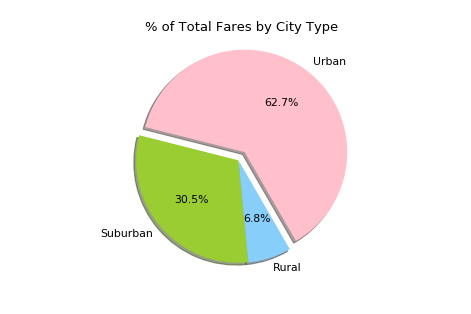

In [218]:
# Calculate Type Percents
total_fares = combined_df['fare'].sum()
total_fares_urban = cities_summary_df[cities_summary_df['type'] == 'Urban']['total_fare_rev'].sum()
total_fares_suburban = cities_summary_df[cities_summary_df['type'] == 'Suburban']['total_fare_rev'].sum()
total_fares_rural = cities_summary_df[cities_summary_df['type'] == 'Rural']['total_fare_rev'].sum()

pct_urban = (total_fares_urban/total_fares)*100
pct_suburban = (total_fares_suburban/total_fares)*100
pct_rural = (total_fares_rural/total_fares)*100

# Build Pie Chart
data = [pct_urban,pct_suburban,pct_rural]
labels = ['Urban','Suburban','Rural']
colors = ["pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0)
plt.pie(data,colors=colors,startangle=300,explode=explode,shadow=True,autopct="%1.1f%%",labels=labels)
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

<IPython.core.display.Javascript object>


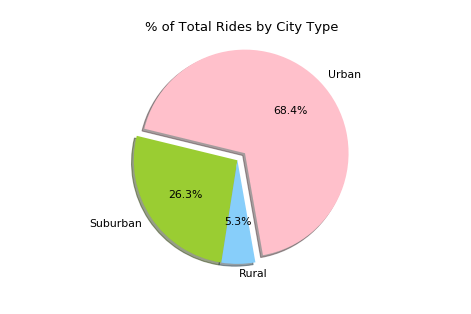

In [224]:
# Calculate Ride Percents
cities_summary_df.head()
total_rides = cities_summary_df['total_rides'].sum()
total_rides_urban = cities_summary_df[cities_summary_df['type'] == 'Urban']['total_rides'].sum()
total_rides_suburban = cities_summary_df[cities_summary_df['type'] == 'Suburban']['total_rides'].sum()
total_rides_rural = cities_summary_df[cities_summary_df['type'] == 'Rural']['total_rides'].sum()

pct_urban = (total_rides_urban/total_rides)*100
pct_suburban = (total_rides_suburban/total_rides)*100
pct_rural = (total_rides_rural/total_rides)*100

# Build Pie Chart
data = [pct_urban,pct_suburban,pct_rural]
labels = ['Urban','Suburban','Rural']
colors = ["pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0)
plt.pie(data,colors=colors,startangle=280,explode=explode,shadow=True,autopct="%1.1f%%",labels=labels)
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

## Total Drivers by City Type

In [220]:
cities_summary_df.head()

,city,type,driver_count,total_rides,total_fare_rev,avg_fare
0,Amandaburgh,Urban,12,18,443.55,24.641667
1,Barajasview,Urban,26,22,557.31,25.332273
2,Barronchester,Suburban,11,16,582.76,36.422500
3,Bethanyland,Suburban,22,18,593.21,32.956111
4,Bradshawfurt,Rural,7,10,400.64,40.064000


<IPython.core.display.Javascript object>


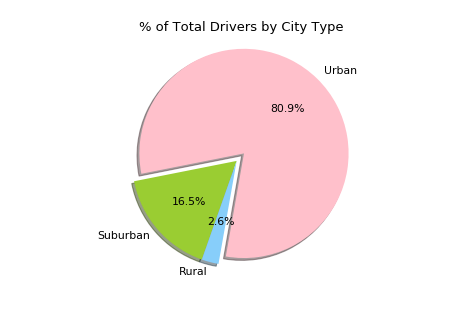

In [225]:
# Calculate Driver Percents
total_drivers = cities_summary_df['driver_count'].sum()
total_drivers_urban = cities_summary_df[cities_summary_df['type'] == 'Urban']['driver_count'].sum()
total_drivers_suburban = cities_summary_df[cities_summary_df['type'] == 'Suburban']['driver_count'].sum()
total_drivers_rural = cities_summary_df[cities_summary_df['type'] == 'Rural']['driver_count'].sum()

pct_urban = (total_drivers_urban/total_drivers)*100
pct_suburban = (total_drivers_suburban/total_drivers)*100
pct_rural = (total_drivers_rural/total_drivers)*100

# # Build Pie Charts
data = [pct_urban,pct_suburban,pct_rural]
labels = ['Urban','Suburban','Rural']
colors = ["pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0)
plt.pie(data,colors=colors,startangle=260,explode=explode,shadow=True,autopct="%1.1f%%",labels=labels)
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()